In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# Options for pandas
pd.set_option('max_colwidth', 200)
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 50)

from IPython.display import display, HTML
display(HTML(""))

ЗАДАНИЯ

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [2]:
df = pd.read_csv(r'churn.csv')

In [3]:
df.drop('RowNumber', axis=1, inplace=True)

In [4]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [5]:
exited = df.Exited.value_counts().reset_index()
exited.replace({0: 'Лояльные',
                1: 'Ушедшие'}, inplace=True)

In [6]:
exited

,index,Exited
0,Лояльные,7963
1,Ушедшие,2037


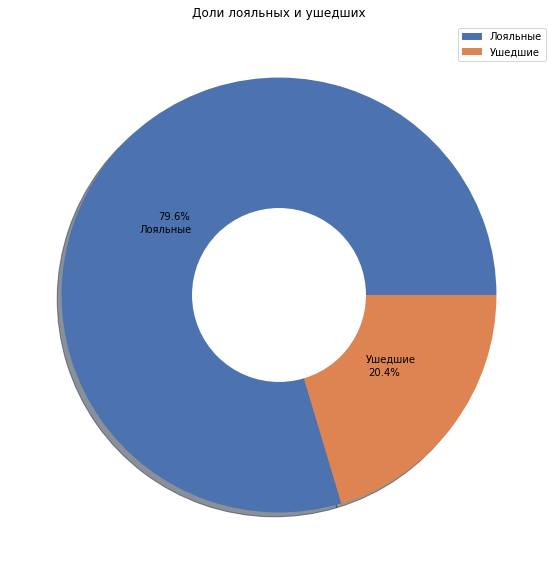

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
data = exited.Exited
labels = exited['index']
colors = sns.color_palette('deep')

plt.pie(data, colors=colors,
        labeldistance=0.5,
        autopct='%.1f%%',
        labels=labels,
        shadow=True)
plt.title('Доли лояльных и ушедших')
plt.legend()
centre_circle = plt.Circle((0, 0), 0.4, fc='white')
fig.gca().add_artist(centre_circle)
fig = plt.gcf()
plt.show();

Отношение лояльных к ушедшим примерно 4 к 1. Лояльных клиентов в 4 раза больше

# Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [8]:
more2500 = df[df.Balance > 2500]
more2500

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


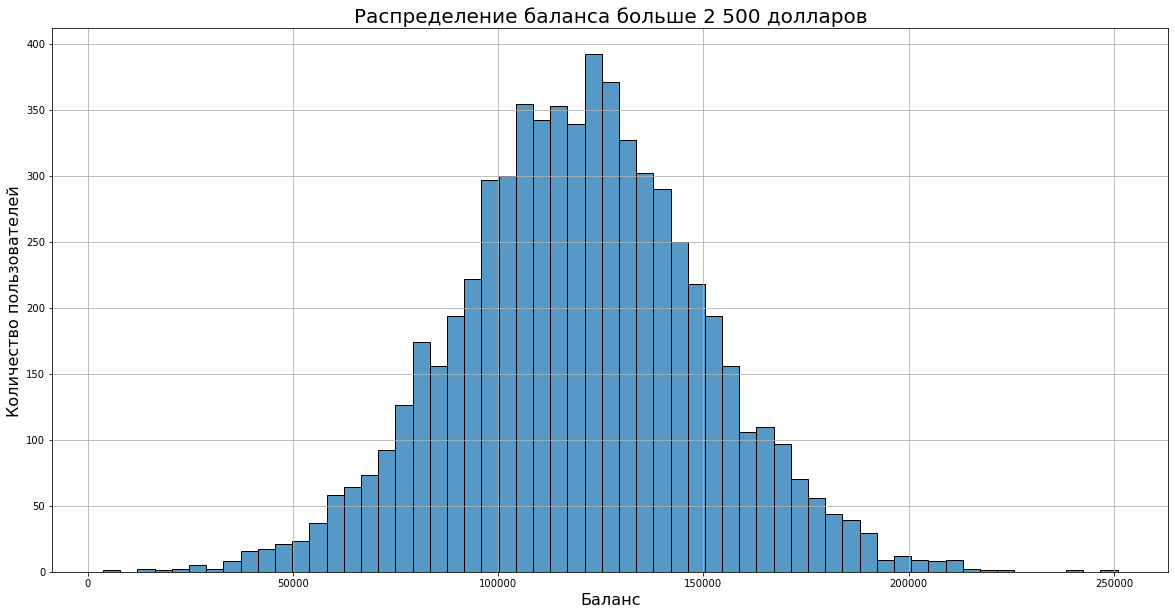

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=more2500, x='Balance')
plt.title('Распределение баланса больше 2 500 долларов',  fontsize=20);
plt.xlabel('Баланс', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.grid()
plt.show();

Распределение баланса пользователей, у которых на счету больше 2 500 долларов, близко к нормальному. Пик значений находится в промежутке между 100 000 и 150 000.

# Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

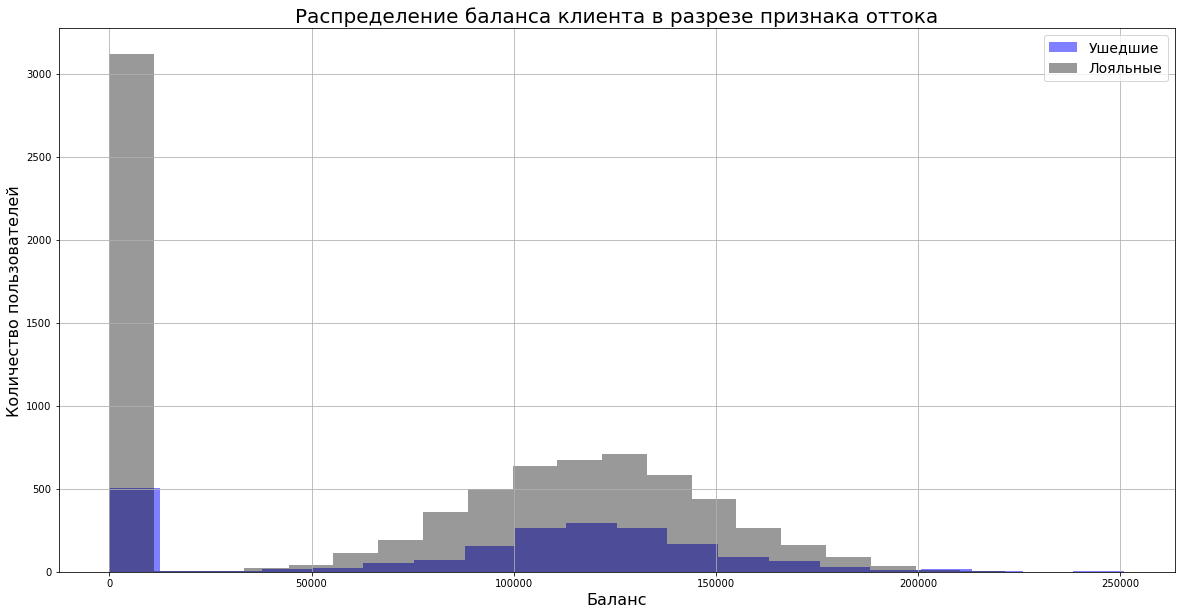

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
df[df.Exited == 1]['Balance'].plot(kind='hist', alpha=0.5, color='blue', bins=20, label='Ушедшие');
df[df.Exited == 0]['Balance'].plot(kind='hist', alpha=0.4, color='black', bins=20, label='Лояльные');
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Баланс', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.title('Распределение баланса клиента в разрезе признака оттока', fontsize=20);

В обоих случаях видим пики около нуля, в остальном распределения близки к нормальным. Также видим, что баланс ушедших в среднем меньше баланса оставшихся.

# Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [11]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


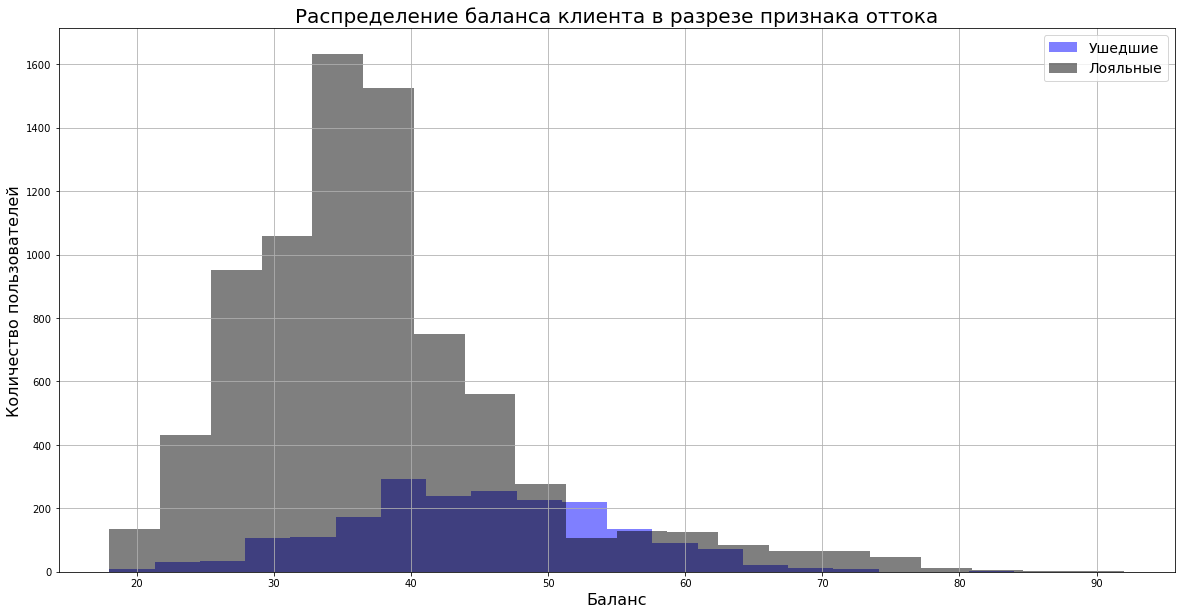

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
df[df.Exited == 1]['Age'].plot(kind='hist', alpha=0.5, color='blue', bins=20, label='Ушедшие');
df[df.Exited == 0]['Age'].plot(kind='hist', alpha=0.5, color='black', bins=20, label='Лояльные');
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Баланс', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.title('Распределение баланса клиента в разрезе признака оттока', fontsize=20);

Видим, что оставшиеся клиенты в своей основной массе - клиенты до 40 лет.

<br>Ушедшие клиенты равномерно распределены примерно от 39 до 52 лет.

''

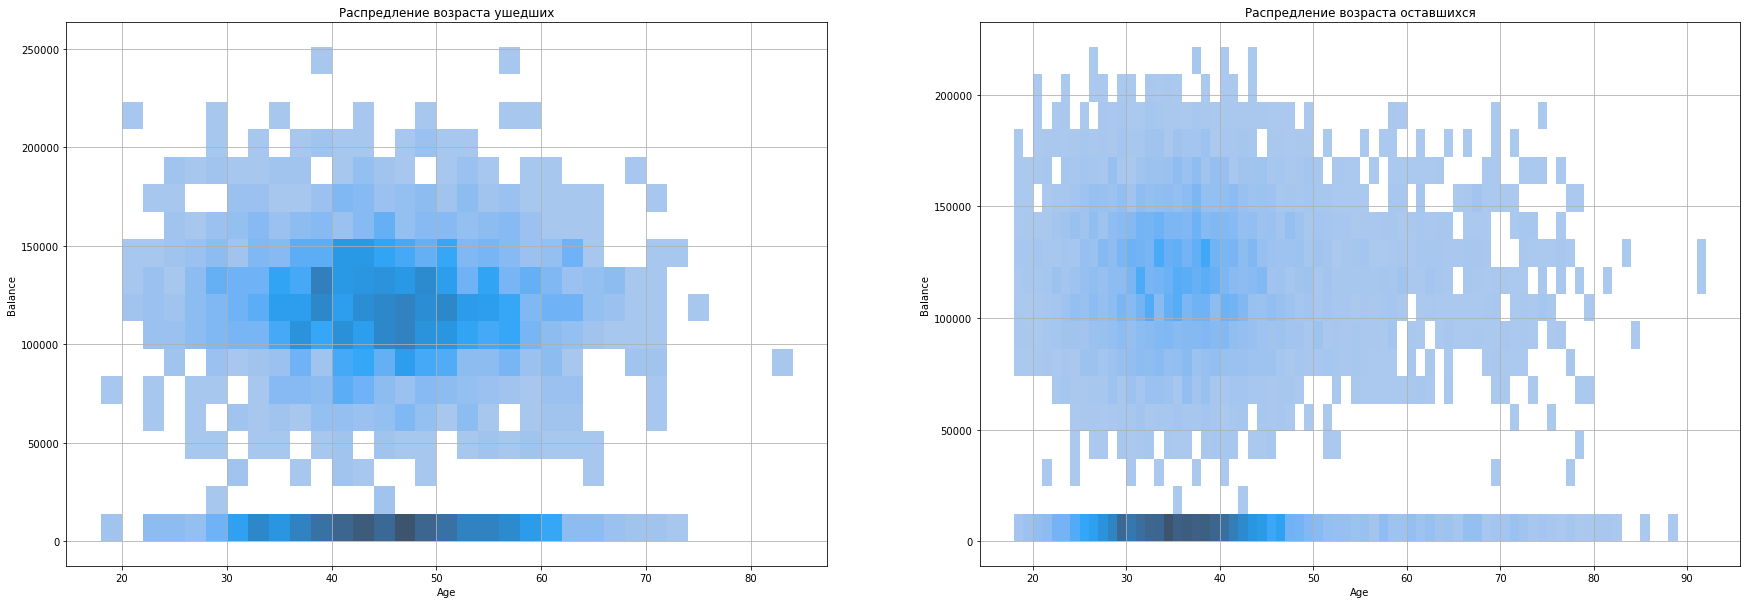

In [13]:
fig, ax = plt.subplots(figsize=(30, 10), nrows=1, ncols=2)
histplot1 = sns.histplot(data=df[df.Exited == 1], x='Age', y='Balance', ax=ax[0]);
histplot1.set_title('Распредление возраста ушедших')
histplot1.grid()
histplot0 = sns.histplot(data=df[df.Exited == 0], x='Age', y='Balance', ax=ax[1]);
histplot0.set_title('Распредление возраста оставшихся')
histplot0.grid()
;

Также видим, что потенциальных выбросов больше всего в старшей возрастной группе. Банку стоит обратить внимание на клиентов старше 60 лет

# Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [14]:
df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


<AxesSubplot:>

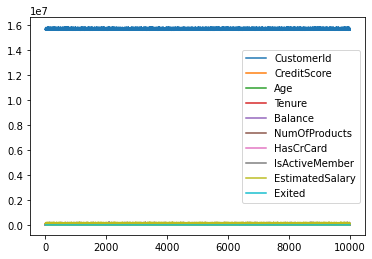

In [15]:
df.plot()

''

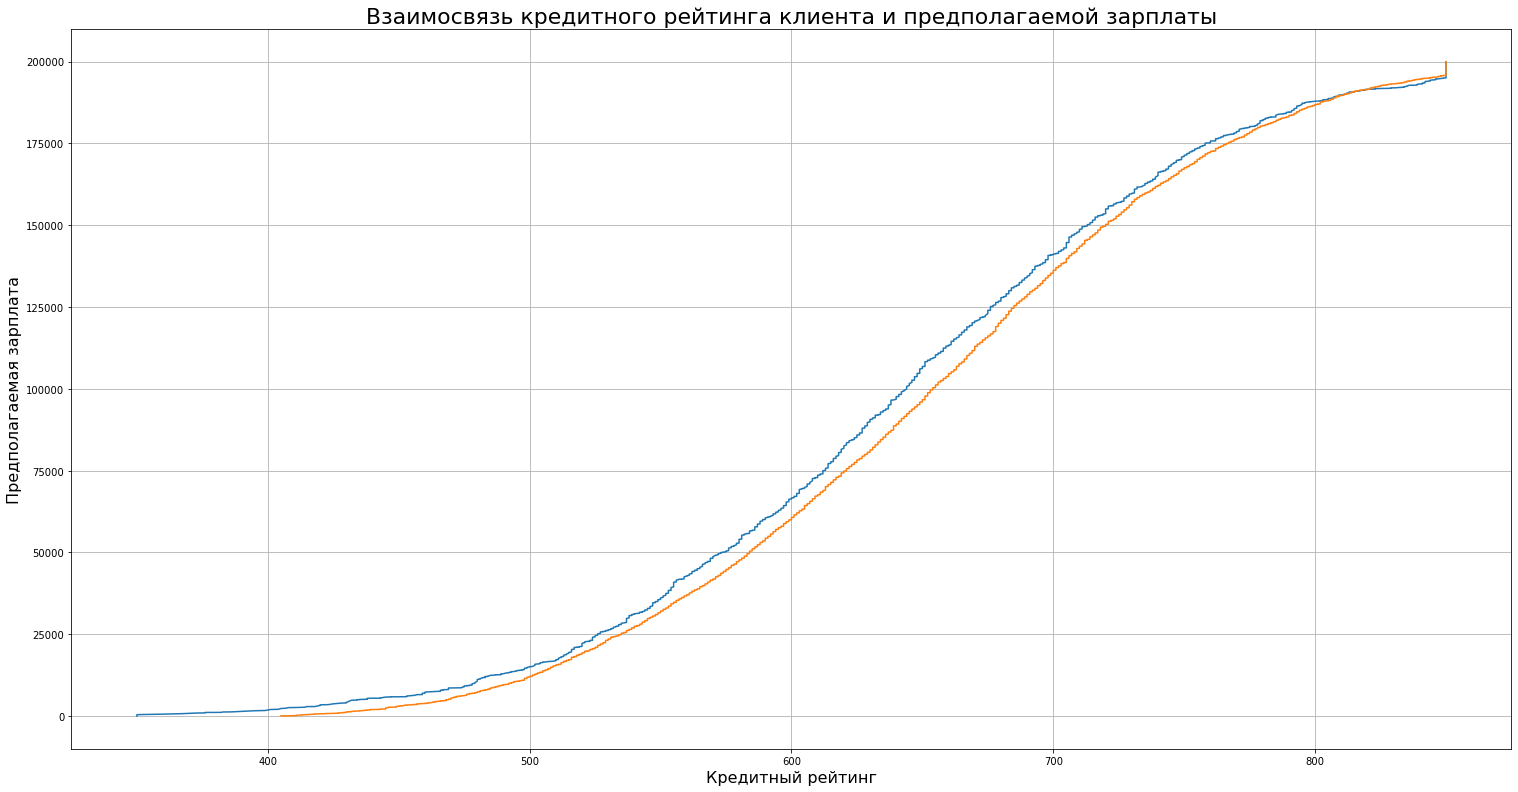

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(df[df.Exited == 1]['CreditScore'].sort_values(), df[df.Exited == 1]['EstimatedSalary'].sort_values())
axes.plot(df[df.Exited == 0]['CreditScore'].sort_values(), df[df.Exited == 0]['EstimatedSalary'].sort_values())
plt.grid()
plt.xlabel('Кредитный рейтинг', fontsize=16)
plt.ylabel('Предполагаемая зарплата', fontsize=16)
plt.title('Взаимосвязь кредитного рейтинга клиента и предполагаемой зарплаты', fontsize=22)
;

Видим прямую зависимость для обеих групп (ушедшие и оставшиеся): чем выше кредитный рейтинг, тем выше предполагаемая зарплата

# Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [17]:
exited = df.groupby('Gender')['Exited'].sum()
exited = exited.reset_index()

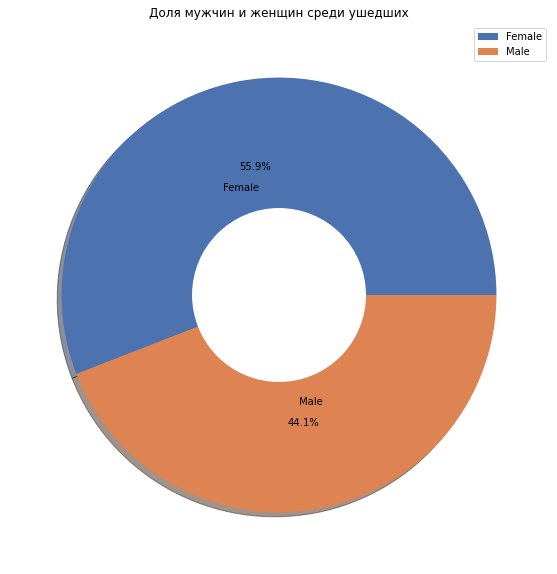

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
data = exited.Exited
labels = exited.Gender
colors = sns.color_palette('deep')

plt.pie(data, colors=colors,
        labeldistance=0.5,
        autopct='%.1f%%',
        labels=labels,
        shadow=True)
plt.title('Доля мужчин и женщин среди ушедших')
plt.legend()
centre_circle = plt.Circle((0, 0), 0.4, fc='white')
fig.gca().add_artist(centre_circle)
fig = plt.gcf()
plt.show();

Распределение почти равномерное, ушедших женщин немного больше

# Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [19]:
df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


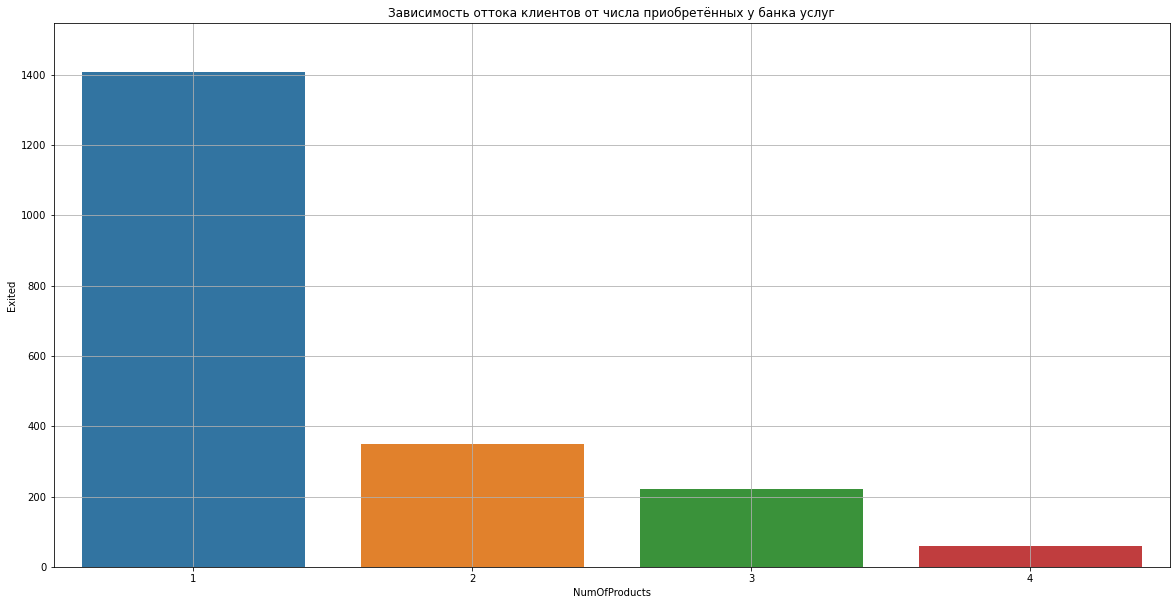

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=df, x='NumOfProducts', y='Exited', estimator=sum, errwidth=0)
plt.title('Зависимость оттока клиентов от числа приобретённых у банка услуг')
plt.grid()
plt.show()

Видим четкую обратную зависимость оттока клиентов от числа приобретённых у банка услуг. Чем больше приобретенных услуг, тем меньше таких клиентов уходит.

# Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0.5, 1.0, 'Влияение статуса "активного клиента" на отток')

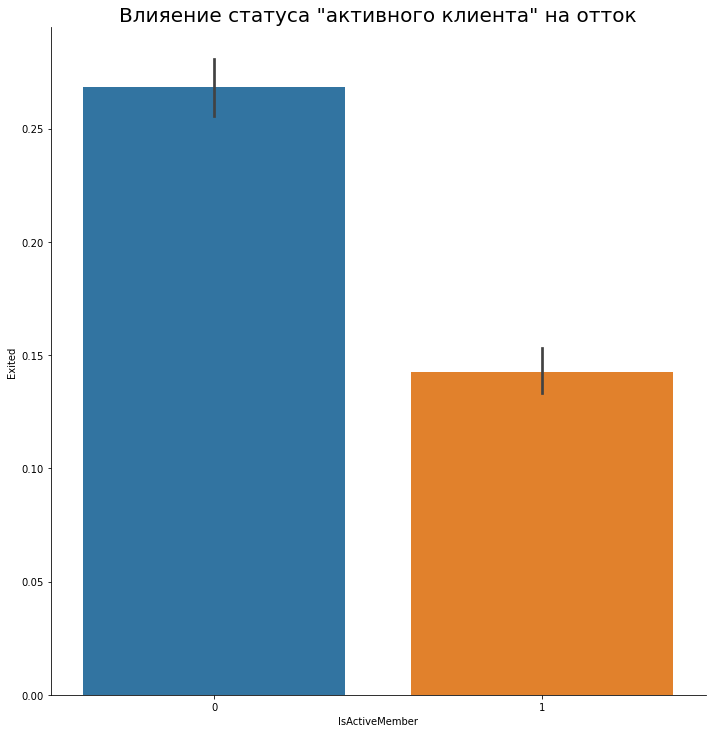

In [47]:
sns.catplot(data=df, x='IsActiveMember', y='Exited', kind='bar', height=10)
plt.title('Влияение статуса "активного клиента" на отток', fontsize=20)

Среди активных клиентов оставшихся в два раза больше, чем ушедших. Банку стоит подумать об проведении мероприятий по увеличению вовлеченности клиента 

#  В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [57]:
df.groupby('Geography').agg(Exited_sum=('Exited', sum))

,Exited_sum
Geography,
France,810
Germany,814
Spain,413


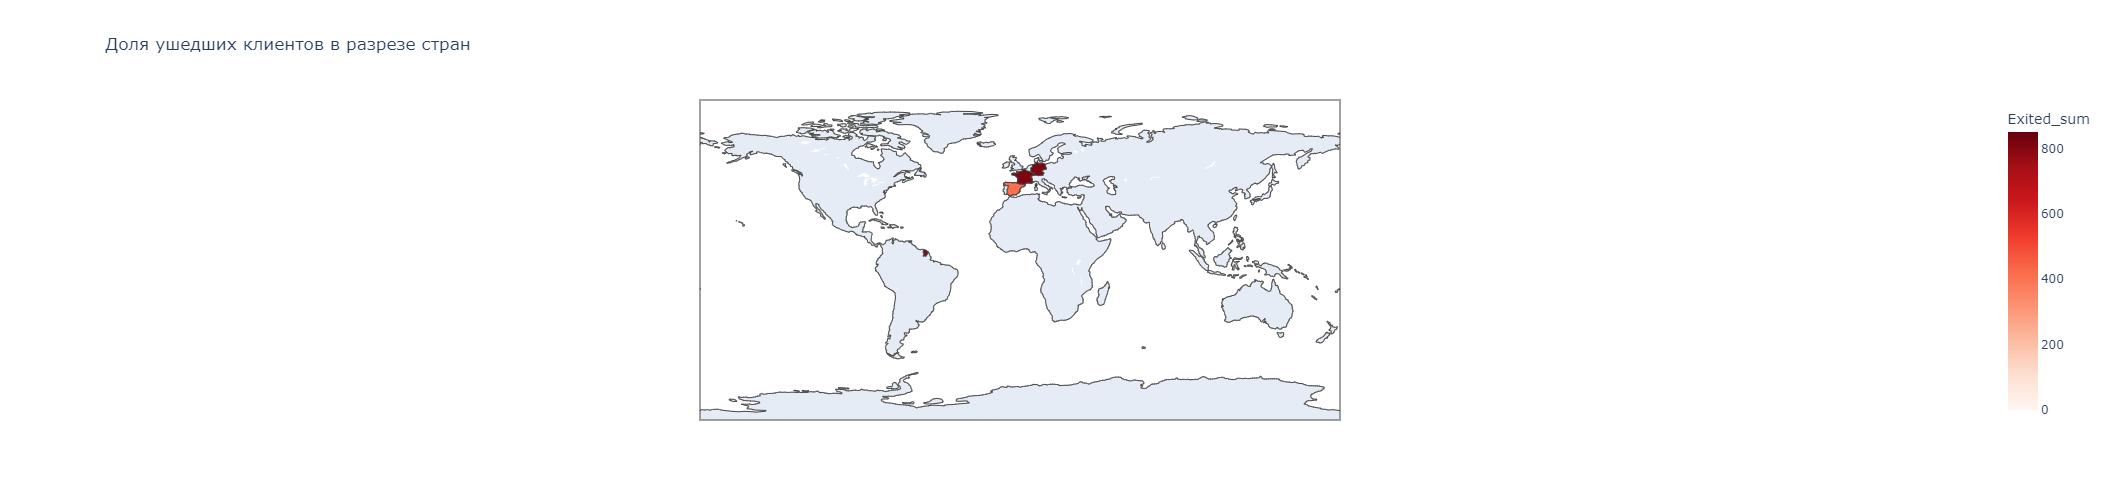

In [61]:
#преобразуем даты в строки
choropleth_data = df.groupby('Geography').agg(Exited_sum=('Exited', sum)).reset_index()

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #датафрейм
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color="Exited_sum", #от чего зависит цвет
    range_color=[0, 850],
    title='Доля ушедших клиентов в разрезе стран', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем его
fig.show()

Вр Франции и Германии ушедших в 2 раза больше, чем в Испании. Связано это может быть как с более широкой линейкой конкурентов, так и с более высоким средним доходом. 

# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 

В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей. На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [65]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
df['CreditScoreCat'] = df.CreditScore.apply(get_credit_score_cat)

credit_pivot = df.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean')

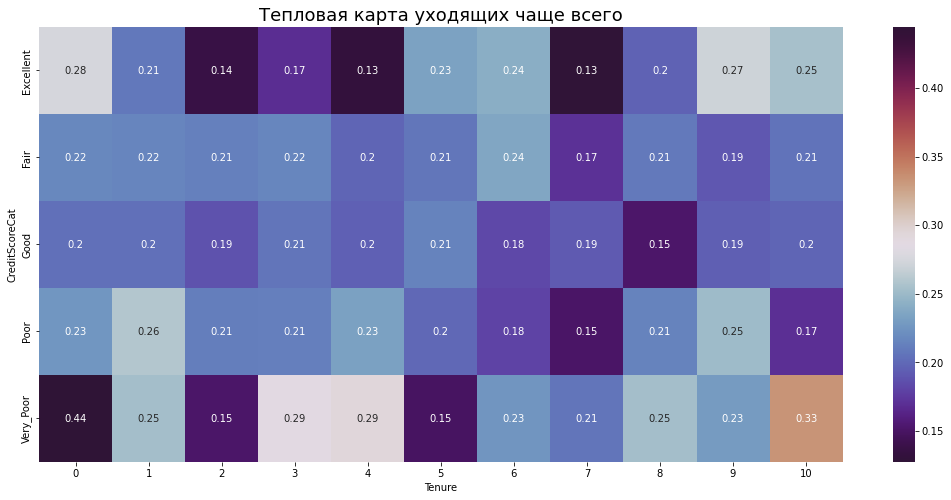

In [92]:
fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(data=credit_pivot, annot=True, cmap='twilight_shifted')
plt.title('Тепловая карта уходящих чаще всего', fontsize=18)
plt.show()

Чаще всего уходят Excellent клиенты в течение первого года. А также самые бедные клиенты на 3, 4 и 10 году. На 9, 10 году также уходят клиенты Excellent.
<br>
В среднем видно, что бедные клиенты двух самых низких категорий в среднем уходят чаще остальных.